In [1]:
# the notebook will reload external python modules;
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../codes')
import os
import cv2
import matplotlib.pyplot as plt
from dataset import VideoDataset
from utils.img_utils import add_bb_on_image

/home/wesley.passos/miniconda3/envs/mosquitoes/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [3]:
#make matplotlib figures appear inline in the notebook
#rather than in a new window.
%matplotlib inline
#sns.set()
# set default size of plots
plt.rcParams['figure.figsize'] = (12.0, 10.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20


In [4]:
video_path = '../data/CEFET/VideoDataSet'
annot_path = '../data/CEFET/zframer-marcacoes'

In [5]:
videos = VideoDataset(video_path, annot_path)

In [6]:
len(videos)

62

In [7]:
sample_idx = -1

In [8]:
sample = videos[sample_idx]
sample.keys()

dict_keys(['video', 'bboxes'])

In [9]:
frame_idx = 150
video = sample['video']
ret, frame, size = video.get_frame(frame_idx)

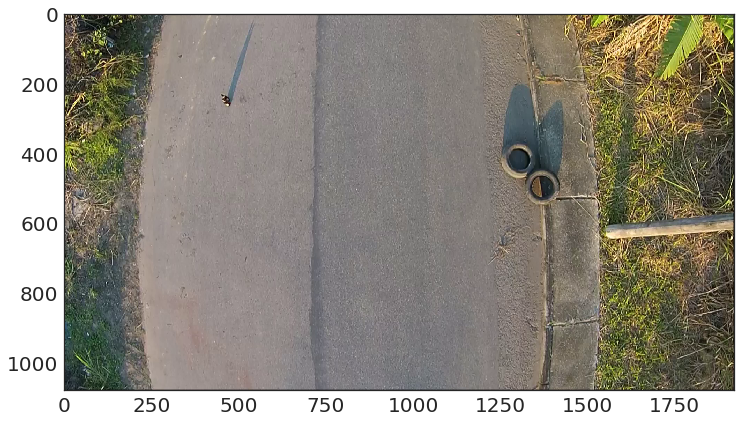

In [10]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.show()

In [11]:
bboxes = sample['bboxes']['frame_{:04d}'.format(frame_idx)]
bboxes

{'Object 1': [1254, 370, 1350, 473], 'Object 2': [1321, 447, 1419, 550]}

In [12]:
for object_name, bb in bboxes.items():
    frame = add_bb_on_image(frame, bb)    

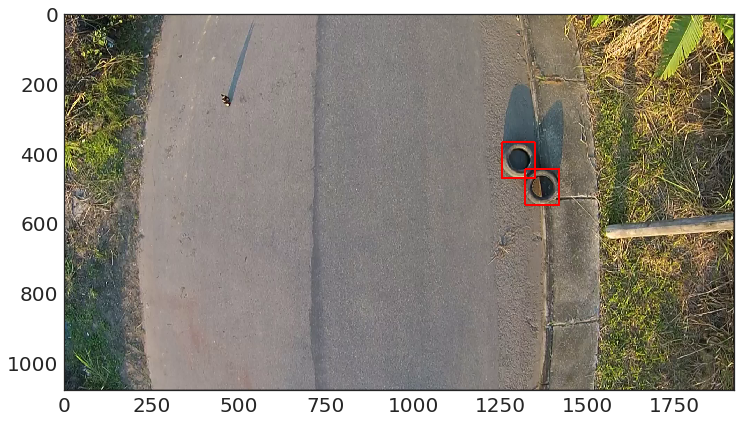

In [13]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.show()

### Testing: comparison between PIMS and CV2

In [14]:
import pims
import cv2

In [15]:
video_path = videos.video_list[sample_idx]

In [16]:
video_pims = pims.Video(video_path)
%timeit video_pims = pims.Video(video_path)

157 ms ± 449 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [17]:
video_cv2 = cv2.VideoCapture(video_path)
%timeit video_cv2 = cv2.VideoCapture(video_path)

52.1 ms ± 512 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [18]:
def get_frame_cv2(vid_obj, frame_req):
    ret = vid_obj.set(cv2.CAP_PROP_POS_FRAMES, frame_req)
    # read video
    ret, frame = vid_obj.read()
    return frame

def get_frame_pims(vid_obj, frame_req):       
    frame = vid_obj[frame_req]
    return frame


In [21]:
frame_pims = get_frame_pims(video_pims, frame_idx)

In [19]:
%timeit frame_pims = get_frame_pims(video_pims, frame_idx)

11.2 µs ± 31.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [22]:
frame_cv2 = get_frame_cv2(video_cv2, frame_idx)

In [20]:
%timeit frame_cv2 = get_frame_cv2(video_cv2, frame_idx)

78.4 ms ± 767 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


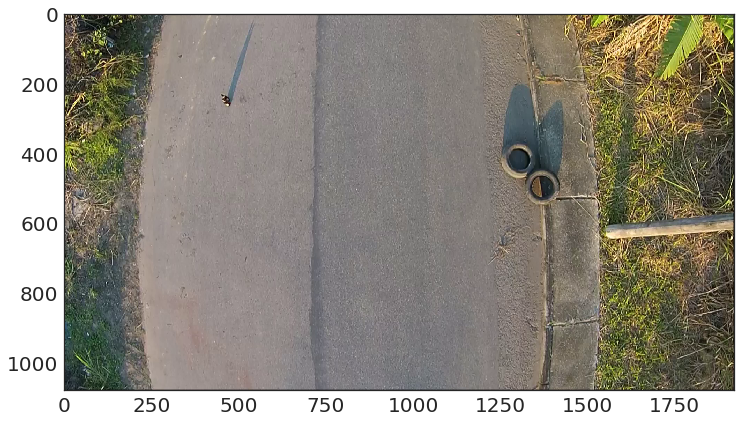

In [25]:
plt.imshow(frame_pims)
plt.show()

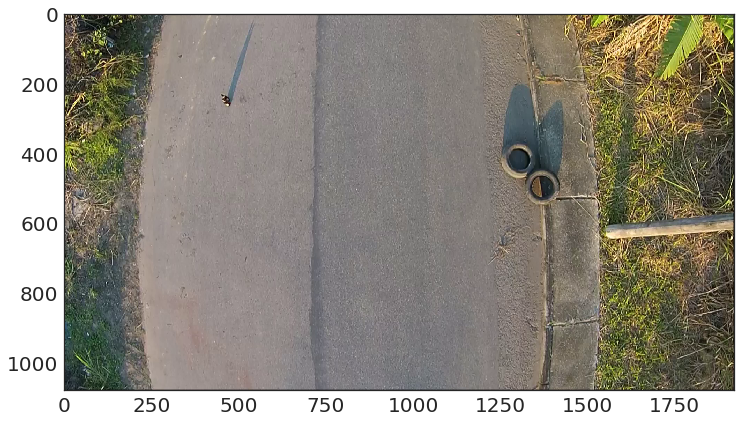

In [23]:
plt.imshow(cv2.cvtColor(frame_cv2, cv2.COLOR_BGR2RGB))
plt.show()

In [7]:
import numpy as np
def test_gen():
    x = np.arange(10)
    for i in x:
        print('UM NUMERO AQUI EMBAIXO')
        yield i
        print('\nvoltei')
    print('fechou')

In [8]:
for a in test_gen():
    print(a)

UM NUMERO AQUI EMBAIXO
0

voltei
UM NUMERO AQUI EMBAIXO
1

voltei
UM NUMERO AQUI EMBAIXO
2

voltei
UM NUMERO AQUI EMBAIXO
3

voltei
UM NUMERO AQUI EMBAIXO
4

voltei
UM NUMERO AQUI EMBAIXO
5

voltei
UM NUMERO AQUI EMBAIXO
6

voltei
UM NUMERO AQUI EMBAIXO
7

voltei
UM NUMERO AQUI EMBAIXO
8

voltei
UM NUMERO AQUI EMBAIXO
9

voltei
fechou
